In [217]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas

In [242]:
sample = r'G:\.shortcut-targets-by-id\1xdIlhiXhJZHnx6m2y3InhSUt5Lyxr89F\data_new_round_September_2023_whole_brain_ket\fish_raw\f1_ket_marc_20230926_140425\seg\analysis\Diencephalon - Anterior group of the posterior tubercular vmat2 neurons\info_analysis.csv'

In [243]:
cells = pandas.read_csv(sample,delimiter = ',')

In [244]:
np.shape(np.array(cells['fc_overall']))

(286,)

In [245]:
baseDir = r'G:\.shortcut-targets-by-id\1xdIlhiXhJZHnx6m2y3InhSUt5Lyxr89F\data_new_round_September_2023_whole_brain_ket\fish_raw'

In [246]:
dirlist = sorted(os.listdir(baseDir))
print(dirlist)

['f1_ket_marc_20230926_140425', 'f2_ket_marc_20230926_163315', 'f3_ket_marc_20230926_190250', 'f4_ket_marc_20230926_203410', 'f5_ket_marc_20230926_214643', 'f6_ket_marc_20230926_225619']


In [247]:
fishIndList = []
fishfcList = []
for dir_i in dirlist:
    fishDir = os.path.join(baseDir,dir_i)
    regionRoot = os.path.join(fishDir,'seg','analysis')
    regionDirs = sorted(os.listdir(regionRoot))
    #print(regionDirs)
    indList = []
    fcList = []
    for i in range(len(regionDirs)):
        regionInd = i
        fileName = os.path.join(regionRoot,regionDirs[i],'info_analysis.csv')
        if(os.path.exists(fileName)):
            cells = pandas.read_csv(fileName,delimiter = ',')
            a = np.array(cells['fc_overall'])
            b = np.ones(np.shape(a))*i
            for j in range(len(a)):
                indList.append(int(b[j]))
                fcList.append(a[j])
        if ((i % 10)==0):
            print(i)
    fishIndList.append(indList)
    fishfcList.append(fcList)
    print(dir_i + ' done') 
                    
        

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
f1_ket_marc_20230926_140425 done
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
f2_ket_marc_20230926_163315 done
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
f3_ket_marc_20230926_190250 done
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
f4_ket_marc_20230926_203410 done
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
f5_ket_marc_20230926_214643 done
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
f6_ket_marc_20230926_225619 done


In [248]:
np.shape(fishIndList[0])

(368453,)

In [249]:
numRegions = 295

In [326]:
fishMean = np.zeros([6,295])
fishMean[:] = np.nan
for i in range(len(fishIndList)):
    inds = np.array(fishIndList[i])
    fcs = np.array(fishfcList[i])
    for j in range(numRegions):
        cells = np.where(inds == j)[0]
        if (len(cells)>0):
            allFcs = fcs[cells]
            sort = np.sort(allFcs)[::-1]
            # now calculate the mean of the top 10% cells
            limit = int(np.ceil(sort.size*0.90)) 
            after = sort[limit:].mean()
            fishMean[i,j] = after
            
        

C:\Users\kodan\AppData\Local\Temp\ipykernel_30224\3949507064.py:13: RuntimeWarning: Mean of empty slice.
  after = sort[limit:].mean()


In [327]:
range(len(fishIndList))

range(0, 6)

In [328]:
np.shape(sort)

(291,)

In [329]:
true_mean = np.nanmean(fishMean,axis=0)
std = np.nanstd(fishMean,axis=0)

C:\Users\kodan\AppData\Local\Temp\ipykernel_30224\139338244.py:1: RuntimeWarning: Mean of empty slice
  true_mean = np.nanmean(fishMean,axis=0)


In [330]:
np.save(r'C:\Users\kodan\OneDrive\Documents\true_mean_05_low.mat',[true_mean, std])

In [331]:
np.nanmax(mean)

-0.8360477189222972

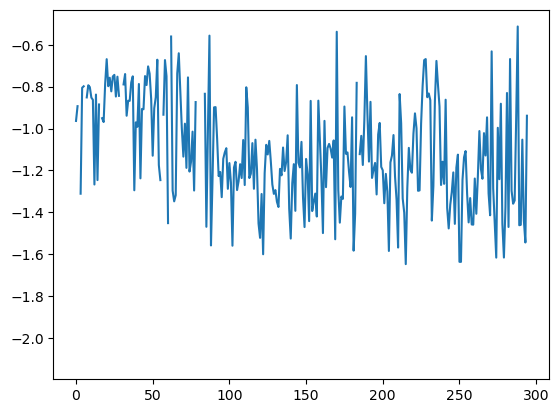

In [332]:
plt.figure()
plt.plot(true_mean)

In [333]:
nBoot = 10000
allFishMean = np.zeros([numRegions,nBoot])
for k in range(nBoot):
    fishMean = np.zeros([6,295])
    fishMean[:] = np.nan
    for i in range(len(fishIndList)):
        inds = np.array(fishIndList[i])
        np.random.shuffle(inds)
        fcs = np.array(fishfcList[i])
        for j in range(numRegions):
            cells = np.where(inds == j)[0]
            if (len(cells)>0):
                allFcs = fcs[cells]
                sort = np.sort(allFcs)[::-1]
                # now calculate the mean of the top 10% cells
                limit = int(np.ceil(sort.size*.90)) 
                after = sort[limit:].mean()
                fishMean[i,j] = after
    mean = np.nanmean(fishMean,axis=0)
    allFishMean[:,k] = mean
    if (k % 100 == 0):
        print(k)

C:\Users\kodan\AppData\Local\Temp\ipykernel_30224\1153315711.py:17: RuntimeWarning: Mean of empty slice.
  after = sort[limit:].mean()
C:\Users\kodan\AppData\Local\Temp\ipykernel_30224\1153315711.py:19: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(fishMean,axis=0)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


In [334]:
allFishMean

array([[-1.27825288, -1.27309113, -1.26795417, ..., -1.27075591,
        -1.26469703, -1.26541916],
       [-1.22951688, -1.25203426, -1.18557417, ..., -1.28434052,
        -1.23847732, -1.25171291],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-1.22133358, -1.26572211, -1.28711274, ..., -1.27962393,
        -1.24925587, -1.29645195],
       [-1.25613647, -1.25183574, -1.26630945, ..., -1.19205698,
        -1.28342564, -1.25917913],
       [-1.24488635, -1.32845357, -1.28000024, ..., -1.11050456,
        -1.20526551, -1.31599513]])

In [257]:
np.save(r'C:\Users\kodan\OneDrive\Documents\bootresults05_neg.mat',allFishMean)

In [335]:
np.shape(allFishMean)

(295, 10000)

In [336]:
region_mean_boot = np.nanmean(allFishMean,axis=1)

C:\Users\kodan\AppData\Local\Temp\ipykernel_30224\992281814.py:1: RuntimeWarning: Mean of empty slice
  region_mean_boot = np.nanmean(allFishMean,axis=1)


In [337]:
region_lower_bound = np.nanpercentile(allFishMean,2.5,axis=1)
region_upper_bound = np.nanpercentile(allFishMean,97.5,axis=1)

In [338]:
sig_regions = np.where(true_mean < region_lower_bound)[0]
#np.save(r'C:\Users\14076\Documents\sigregions05_low.mat',sig_regions)

In [325]:
bootstrap_summary = [region_mean_boot[sig_regions], region_lower_bound[sig_regions], region_upper_bound[sig_regions], true_mean[sig_regions], std[sig_regions]]
np.save(r'C:\Users\kodan\OneDrive\Documents\boot_summary_05_neg_final.mat',bootstrap_summary)

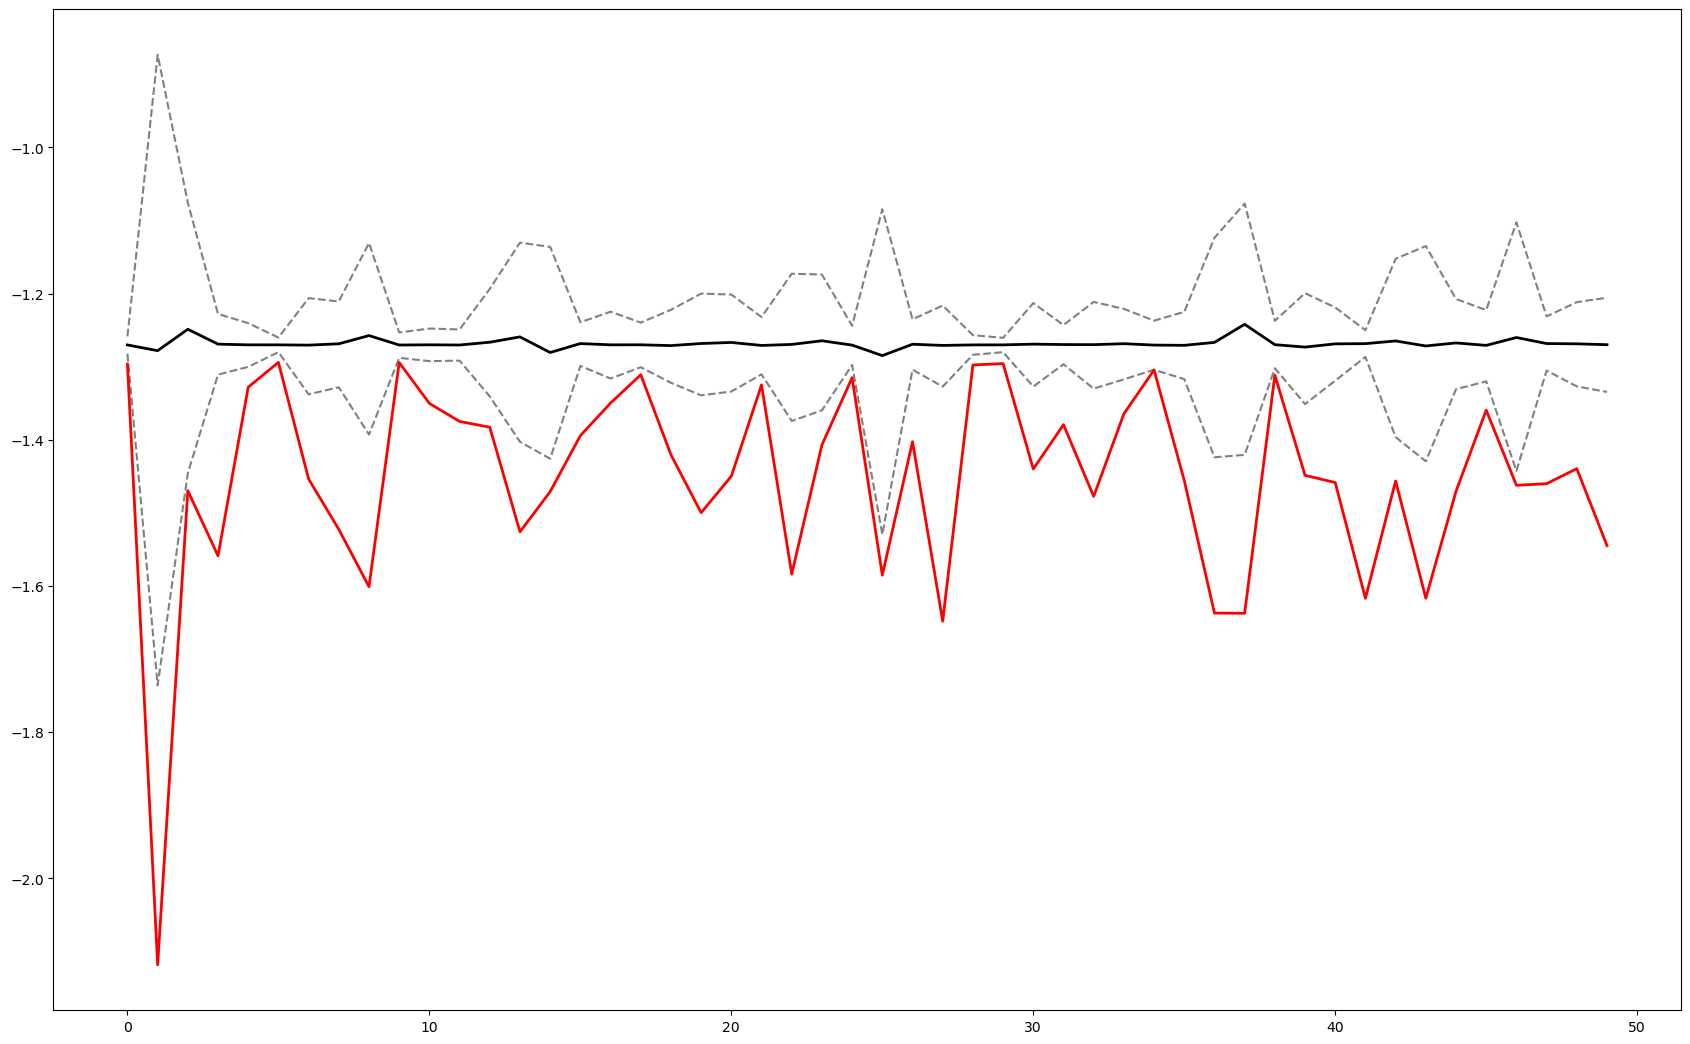

In [339]:
plt.figure(figsize=(21,13))
plt.plot(region_mean_boot[sig_regions],color = 'black',linewidth=2)
plt.plot(region_lower_bound[sig_regions],color='grey',linestyle='--')
plt.plot(region_upper_bound[sig_regions],color='grey',linestyle='--')
plt.plot(true_mean[sig_regions],color = 'red',linewidth=2)

In [306]:
np.save(r'C:\Users\kodan\OneDrive\Documents\bootresults05_neg_list_final.mat',regionDirs[sig_regions])

TypeError: only integer scalar arrays can be converted to a scalar index

In [340]:
sig_list = []
for i in sig_regions:
    print(regionDirs[i])
    sig_list.append(regionDirs[i])

Ganglia - Eyes
Ganglia - Lateral Line Neuromast D1
Ganglia - Lateral Line Neuromast SO1
Ganglia - Olfactory Epithelium
Mesencephalon - Medial Tectal Band
Mesencephalon - Tectum Stratum Periventriculare
Rhombencephalon - 6.7FDhcrtR-Gal4 Stripe 1
Rhombencephalon - 6.7FDhcrtR-Gal4 Stripe 2
Rhombencephalon - 6.7FDhcrtR-Gal4 Stripe 4
Rhombencephalon - Cerebellum
Rhombencephalon - Cerebellum Gad1b Enriched Areas
Rhombencephalon - Corpus Cerebelli
Rhombencephalon - Gad1b Cluster 14
Rhombencephalon - Gad1b Cluster 15
Rhombencephalon - Gad1b Cluster 5
Rhombencephalon - Gad1b Stripe 1
Rhombencephalon - Gad1b Stripe 2
Rhombencephalon - Gad1b Stripe 3
Rhombencephalon - Glyt2 Cluster 1
Rhombencephalon - Glyt2 Cluster 13
Rhombencephalon - Glyt2 Stripe 2
Rhombencephalon - Glyt2 Stripe 3
Rhombencephalon - Lobus caudalis cerebelli
Rhombencephalon - Locus Coreuleus
Rhombencephalon - Neuropil Region 4
Rhombencephalon - Otpb Cluster 1
Rhombencephalon - Ptf1a Stripe
Rhombencephalon - Qrfp neuron cluster sp

In [158]:
sig_region_info = {}
sig_region_info['id'] = []
sig_region_info['mean'] = []
sig_region_info['std'] = []


In [317]:
for i in sig_regions:
    sig_region_info['id'].append(regionDirs[i])
    sig_region_info['mean'].append(mean[i])
    sig_region_info['std'].append(std[i])

In [301]:
sig_region_info

{'id': ['Diencephalon -',
  'Diencephalon - Anterior group of the posterior tubercular vmat2 neurons',
  'Diencephalon - Anterior pretectum cluster of vmat2 Neurons',
  'Diencephalon - Diffuse Nucleus of the Intermediate Hypothalamus',
  'Diencephalon - Dopaminergic Cluster 2 - posterior tuberculum',
  'Diencephalon - Dopaminergic Cluster 3 - hypothalamus',
  'Diencephalon - Dopaminergic Cluster 4_5 - posterior tuberculum and hypothalamus',
  'Diencephalon - Dopaminergic Cluster 6 - hypothalamus',
  'Diencephalon - Dorsal Thalamus',
  'Diencephalon - Eminentia Thalami',
  'Diencephalon - Habenula',
  'Diencephalon - Hypothalamus 6.7FRhcrtR-Gal4 cluster 1',
  'Diencephalon - Hypothalamus 6.7FRhcrtR-Gal4 cluster 2',
  'Diencephalon - Hypothalamus Gad1b Cluster 1',
  'Diencephalon - Hypothalamus Gad1b Cluster 2',
  'Diencephalon - Hypothalamus Hcrt Neurons',
  'Diencephalon - Hypothalamus Qrfp neuron cluster',
  'Diencephalon - Hypothalamus Vglut2 Cluster 1',
  'Diencephalon - Hypothalamu

In [311]:
np.save(r'C:\Users\kodan\OneDrive\Documents\bootresults05_neg_list.mat',sig_list)

In [302]:
np.save(r'C:\Users\14076\Documents\summary_stats_low.npy',sig_region_info)